## Install

In [0]:
!pip3 install torch torchvision numpy

## Imports

In [0]:
from matplotlib import pyplot as plt
import numpy as np
import torch as th
import torchvision
from torch import nn
from torchvision import transforms

## Basic autograd example 1

In [3]:
# Create tensors.
x = th.tensor(1, requires_grad=True)
w = th.tensor(2, requires_grad=True)
b = th.tensor(3, requires_grad=True)

# Build a computational graph.
y = w * x + b    # y = 2 * x + 3

# Compute gradients.
y.backward()

# Print out the gradients.
print(x.grad)    # x.grad = 2 
print(w.grad)    # w.grad = 1 
print(b.grad)    # b.grad = 1 

tensor(2)
tensor(1)
tensor(1)


## Basic autograd example 2

In [9]:
# Create tensors of shape (10, 3) and (10, 2).
x = th.randn(10, 3)
y = th.randn(10, 2)

# Build a fully connected layer.
linear = nn.Linear(3, 2)
print('w: ', linear.weight)
print('b: ', linear.bias)

w:  Parameter containing:
tensor([[ 0.0091,  0.3821,  0.4042],
        [ 0.1977, -0.3402, -0.0540]])
b:  Parameter containing:
tensor([ 0.5002, -0.1123])


In [10]:
# Build loss function and optimizer.
criterion = nn.MSELoss()
optimizer = th.optim.SGD(linear.parameters(), lr=0.01)

# Forward pass.
pred = linear(x)
pred

tensor([[-0.2111, -0.0684],
        [ 1.0610, -0.3766],
        [-0.2755,  0.3312],
        [ 0.7346, -0.0327],
        [ 0.1861, -0.0003],
        [ 0.8453, -0.8238],
        [-0.9671,  0.8164],
        [-0.2735,  0.5487],
        [ 0.9150, -0.7740],
        [ 0.2339,  0.7006]])

In [11]:
# Compute loss.
loss = criterion(pred, y)
loss

tensor(1.2691)

In [12]:
# Backward pass.
loss.backward()

# Print out the gradients.
print('dL/dw: ', linear.weight.grad)
print('dL/db: ', linear.bias.grad)

dL/dw:  tensor([[-0.2611,  0.9674,  0.2301],
        [ 0.3606, -0.6496,  0.2071]])
dL/db:  tensor([ 0.4349,  0.0781])


In [14]:
# 1-step gradient descent.
optimizer.step()

# You can also perform gradient descent at the low level.
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after 1-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1-step optimization: ', loss.item())

loss after 1-step optimization:  1.2327524423599243


## Loading data from numpy

In [15]:
# Create a numpy array.
x = np.array([[1, 2], [3, 4]])
x

array([[1, 2],
       [3, 4]])

In [18]:
# Convert the numpy array to a torch tensor.
y = th.from_numpy(x)
y

tensor([[ 1,  2],
        [ 3,  4]])

In [19]:
# Convert the torch tensor to a numpy array.
z = y.numpy()
z

array([[1, 2],
       [3, 4]])

## Input pipeline (cifar10)

In [69]:
# Download and construct CIFAR-10 dataset.
train_dataset = torchvision.datasets.CIFAR10(root='~/code/data/cifar10/',
                                             train=True,
                                             transform=transforms.ToTensor(),
                                             download=True)
print(train_dataset)

Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 50000
    Split: train
    Root Location: /home/z/code/data/cifar10/
    Transforms (if any): ToTensor()
    Target Transforms (if any): None


torch.Size([3, 32, 32])
6


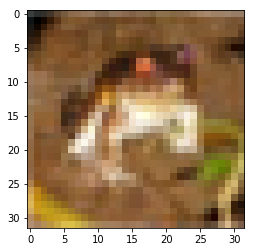

In [65]:
# Fetch one data pair (reads data from disk).
image, label = train_dataset[0]
print(image.size())
print(label)
plt.imshow(image.permute([1, 2, 0]),)

In [0]:
# Data loader (provides queues and threads in a very simple way).
train_loader = th.utils.data.DataLoader(dataset=train_dataset,
                                        batch_size=64,
                                        shuffle=True)

In [70]:
# When iteration starts, queue and thread start to load data from files.
data_iter = iter(train_loader)

# Mini-batch images and labels.
images, labels = data_iter.next()
print(images.size())
print(labels.size())

torch.Size([64, 3, 32, 32])
torch.Size([64])


In [0]:
# Actual usage of the data load.
for images, labels in train_loader:
  # Training code should be written here.
  pass

## Input pipeline for custom dataset

In [0]:
# Build a custom dataset.
class CustomDataset(th.utils.data.Dataset):
  def __init__(self):
    # TODO
    # 1. Initialize file paths or list of file names.
    pass
  
  def __getitem__(self, index):
    # TODO
    # 1. Read one datum from file (e.g. using numpy.fromfile, PIL.Image.open).
    # 2. Preprocess the datum (e.g. torchvision.Transform).
    # 3. Return the datum (e.g. image and label).
    pass
  
  def __len__(self):
    # Return the total size of the dataset.
    return 0

In [0]:
# You can then use the custom dataset with the standard data loader.
custom_dataset = CustomDataset()
train_loader = th.utils.data.DataLoader(dataset=custom_dataset,
                                        batch_size=64,
                                        shuffle=True)

## ImageNet

In [165]:
# No labels yet.
def get_imagenet_dataset(split):
  assert split == 'test'
  data_dir = '/home/z/code/data/imagenet_2017/' + split
  ds = torchvision.datasets.ImageFolder(
      data_dir,
      transforms.Compose([
          transforms.RandomResizedCrop(224),
          transforms.RandomHorizontalFlip(),
          transforms.ToTensor(),
          #transforms.Normalize(mean=[0.485, 0.456, 0.406],
          #                     std=[0.229, 0.224, 0.225]),
      ])
  )
  return ds

imagenet_dataset = get_imagenet_dataset('test')
len(imagenet_dataset)
imagenet_dataset.classes

['ILSVRC']

In [161]:
import scipy.io as sio
gt = sio.loadmat('/home/z/Downloads/ILSVRC/devkit/data/ILSVRC2015_det_validation_ground_truth.mat')
len(gt['gt_obj_labels'][0])

20121

torch.Size([3, 224, 224])
0


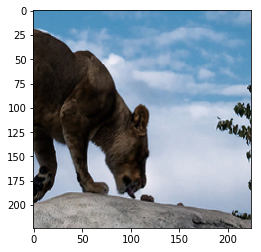

In [166]:
image, label = imagenet_dataset[0]
print(image.size())
print(label)
plt.imshow(image.permute([1, 2, 0]),)

## Pretrained model

In [99]:
# Download and load the pretrained ResNet-18.
resnet = torchvision.models.resnet18(pretrained=True)

# Examine the model.
print('Named modules: ', [i[0] for i in resnet.named_modules()])

Named modules:  ['', 'conv1', 'bn1', 'relu', 'maxpool', 'layer1', 'layer1.0', 'layer1.0.conv1', 'layer1.0.bn1', 'layer1.0.relu', 'layer1.0.conv2', 'layer1.0.bn2', 'layer1.1', 'layer1.1.conv1', 'layer1.1.bn1', 'layer1.1.relu', 'layer1.1.conv2', 'layer1.1.bn2', 'layer2', 'layer2.0', 'layer2.0.conv1', 'layer2.0.bn1', 'layer2.0.relu', 'layer2.0.conv2', 'layer2.0.bn2', 'layer2.0.downsample', 'layer2.0.downsample.0', 'layer2.0.downsample.1', 'layer2.1', 'layer2.1.conv1', 'layer2.1.bn1', 'layer2.1.relu', 'layer2.1.conv2', 'layer2.1.bn2', 'layer3', 'layer3.0', 'layer3.0.conv1', 'layer3.0.bn1', 'layer3.0.relu', 'layer3.0.conv2', 'layer3.0.bn2', 'layer3.0.downsample', 'layer3.0.downsample.0', 'layer3.0.downsample.1', 'layer3.1', 'layer3.1.conv1', 'layer3.1.bn1', 'layer3.1.relu', 'layer3.1.conv2', 'layer3.1.bn2', 'layer4', 'layer4.0', 'layer4.0.conv1', 'layer4.0.bn1', 'layer4.0.relu', 'layer4.0.conv2', 'layer4.0.bn2', 'layer4.0.downsample', 'layer4.0.downsample.0', 'layer4.0.downsample.1', 'layer

### Running inference

In [0]:
imagenet_test = torchvision.datasets.

In [100]:
# To finetune only the top layer of the model, freeze all params...
for param in resnet.parameters():
  param.requires_grad = False
  
# and replace the top layer.
print('Old fc: ', resnet.fc)
resnet.fc = nn.Linear(resnet.fc.in_features, 100)  # 100 is an example.
print('New fc: ', resnet.fc)

Old fc:  Linear(in_features=512, out_features=1000, bias=True)
New fc:  Linear(in_features=512, out_features=100, bias=True)


In [92]:
# Forward pass.
images = th.randn(64, 3, 224, 224)
outputs = resnet(images)
outputs.size()

torch.Size([64, 100])

## Save and load the model

In [104]:
# Save and load the entire model.
th.save(resnet, '/tmp/model.ckpt')
model = th.load('/tmp/model.ckpt')
!ls -l /tmp/model.ckpt

-rw-r--r-- 1 z z 44994084 May 19 21:03 /tmp/model.ckpt


In [105]:
# Save and load only the model params (recommended approach).
th.save(resnet.state_dict(), '/tmp/params.ckpt')
resnet.load_state_dict(th.load('/tmp/params.ckpt'))
!ls -l /tmp/params.ckpt

-rw-r--r-- 1 z z 44966051 May 19 21:03 /tmp/params.ckpt
